<a href="https://colab.research.google.com/github/ahmadpnb/combinationforecast/blob/main/Combination_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Equal Weight for monthly forecast

import pandas as pd
import matplotlib.pyplot as plt

# Load your Excel file into a Pandas DataFrame
path = '/content/drive/MyDrive/Internship/forecast.xlsx'
data = pd.read_excel(path)

# Decide on combination weights (example: equal weights for each model)
vecm1_weight = 1/3
vecm2_weight = 1/3
arima_weight = 1/3

# Extract the forecasted values and time periods from each column
vecm1_values = data['vecm_1'].values
vecm2_values = data['vecm_2'].values
arima_values = data['arima'].values
time_periods = data['Time Period'].values

# Calculate the combined forecast
combined_forecast = (arima_weight * arima_values) + (vecm1_weight * vecm1_values) + (vecm2_weight * vecm2_values)

# Create a new dataframe to store the combined forecast results
combined_results = pd.DataFrame({'Time Period': time_periods, 'Combined Forecast': combined_forecast})

# Export the combined forecast results to Excel
combined_results.to_excel('combined_forecast_results.xlsx', index=False)

display(combined_results)

,Time Period,Combined Forecast
0,3Q2023,4.085443
1,4Q2023,3.997412
2,1Q2024,3.924299
3,2Q2024,3.863152


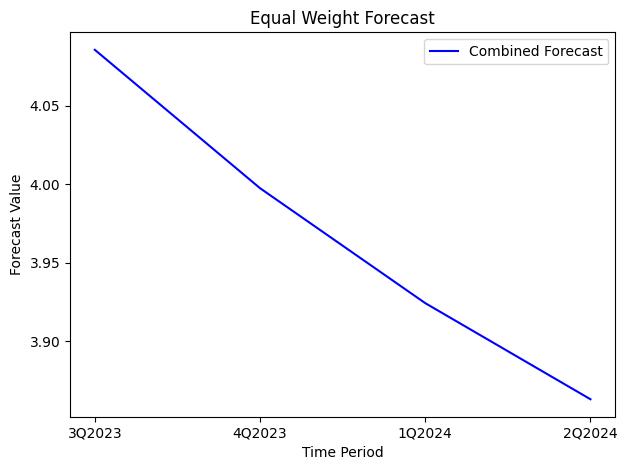

In [9]:
# Extract time periods and combined forecast values
time_periods = combined_results['Time Period']
combined_forecast = combined_results['Combined Forecast']

# Create a line plot to visualize the combined forecast
plt.figure
plt.plot(time_periods, combined_forecast, label='Combined Forecast', color='blue')
plt.xlabel('Time Period')
plt.ylabel('Forecast Value')
plt.title('Equal Weight Forecast')
plt.grid(False)
plt.legend()
plt.xticks(rotation=0)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()

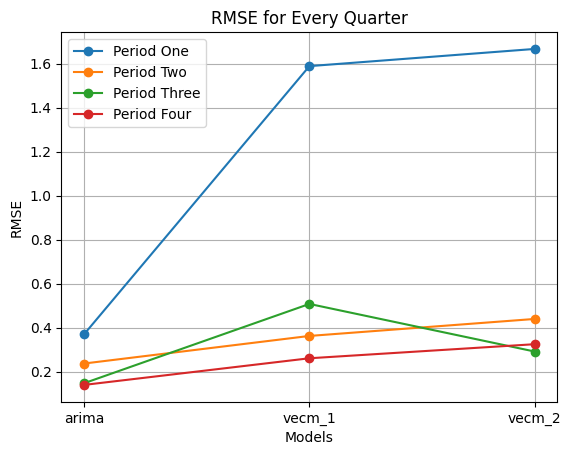

In [11]:
import matplotlib.pyplot as plt

# Data
models = ["arima", "vecm_1", "vecm_2"]
one_step_rmse = [0.3693, 1.5891, 1.6673]
two_step_rmse = [0.2369, 0.3624, 0.4397]
three_step_rmse = [0.1472, 0.5079, 0.2913]
four_quarter_rmse = [0.1397, 0.2609, 0.3249]
periods = ["Period One", "Period Two", "Period Three", "Period Four"]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot RMSE for one step ahead
ax.plot(models, one_step_rmse, label='Period One', marker='o')

# Plot RMSE for two quarters ahead
ax.plot(models, two_step_rmse, label='Period Two', marker='o')

# Plot RMSE for three quarters ahead
ax.plot(models, three_step_rmse, label='Period Three', marker='o')

# Plot RMSE for four quarters ahead
ax.plot(models, four_quarter_rmse, label='Period Four', marker='o')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('RMSE')
ax.set_title('RMSE for Every Quarter')
ax.legend()

# Set the x-axis ticks and labels
ax.set_xticks(models)
ax.set_xticklabels(models)

# Show the plot
plt.grid(True)
plt.show()

In [13]:
# Combination Forecasting using Average over Period RMSE

# Given RMSE values for each model and for each quarter
rmse_values = {
    "arima": [0.3693, 0.2369, 0.1472, 0.1397],
    "vecm_1": [1.5891, 0.3624, 0.5079, 0.2609],
    "vecm_2": [1.6673, 0.4397, 0.2913, 0.3249]
}


# Given forecasts for each model and for each quarter
forecasts = {
    "vecm_1": [3.8505, 3.3900, 2.9835, 2.6312],
    "vecm_2": [4.2520, 4.4328, 4.6065, 4.7651],
    "arima": [4.1538, 4.1694, 4.1829, 4.1931]
}

# Initialize a list to store the results for each quarter
results = []

# Define the quarters
quarters = ["3Q2023", "4Q2023", "1Q2024", "2Q2024"]

for quarter in quarters:
    combined_forecast = 0  # Initialize the combined forecast

    for model in rmse_values.keys():
        # Step 1: Calculate the Relative Error for the model and the current quarter
        relative_error = 1.0 / rmse_values[model][quarters.index(quarter)]

        # Step 2: Normalize the Relative Error
        total_relative_error = sum(1.0 / rmse_values[m][quarters.index(quarter)] for m in rmse_values)
        weight = relative_error / total_relative_error

        # Step 3: Combine Forecasts using Weighted Average for the current quarter
        combined_forecast += weight * forecasts[model][quarters.index(quarter)]

    # Append the results to the list
    results.append({"Quarter": quarter, "Combined Forecast": combined_forecast})

# Create a DataFrame from the results
combined_forecasts_df = pd.DataFrame(results)

# Display the combined forecasts for each quarter
display(combined_forecasts_df)

,Quarter,Combined Forecast
0,3Q2023,4.120280
1,4Q2023,4.001745
2,1Q2024,4.108501
3,2Q2024,3.892719


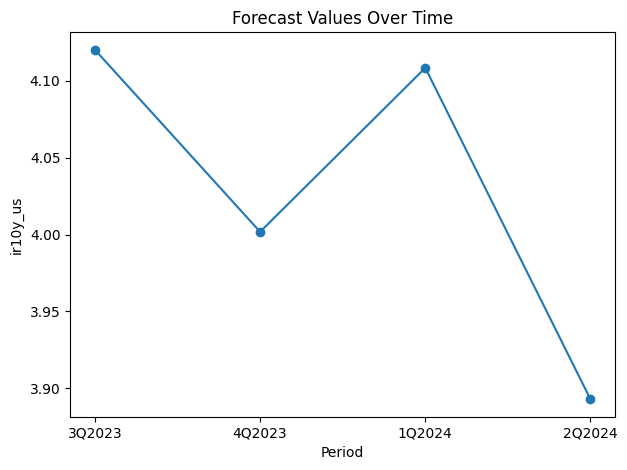

In [20]:
# Plotting the forecast into a graph

# Plotting the data
plt.figure  # Adjust the figure size as needed
plt.plot(combined_forecasts_df['Quarter'], combined_forecasts_df['Combined Forecast'], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Period')
plt.ylabel('ir10y_us')
plt.title('Forecast Values Over Time')

# Rotating the x-axis labels for better readability (optional)
plt.xticks(rotation=0)

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()
